In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


# Adding conv and dense layers to train 

In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initially

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])
learning_rate= 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Early Stopping Callback

In [5]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)



# Train the Model

In [6]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1752589050.509390    1981 service.cc:148] XLA service 0x7ddd20017310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752589050.509456    1981 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752589050.509462    1981 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752589051.062464    1981 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752589064.216253    1981 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


130/130 ━━━━━━━━━━━━━━━━━━━━ 123s 809ms/step - accuracy: 0.5721 - loss: 1.1002 - val_accuracy: 0.8320 - val_loss: 0.8591
Epoch 2/30
  1/130 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.7812 - loss: 0.7785

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.7812 - loss: 0.7785 - val_accuracy: 0.8379 - val_loss: 0.8589
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 97s 748ms/step - accuracy: 0.7397 - loss: 0.8378 - val_accuracy: 0.8486 - val_loss: 0.7861
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.8438 - loss: 0.8209 - val_accuracy: 0.8389 - val_loss: 0.7855
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 97s 750ms/step - accuracy: 0.7903 - loss: 0.7586 - val_accuracy: 0.8867 - val_loss: 0.6608
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.9062 - loss: 0.5799 - val_accuracy: 0.8789 - val_loss: 0.6668
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 100s 769ms/step - accuracy: 0.8131 - loss: 0.6992 - val_accuracy: 0.8779 - val_loss: 0.5947
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9375 - loss: 0.4964 - val_accuracy: 0.8955 - val_loss: 0.5726
Epoch 9/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 98s 752ms/step - accuracy: 0.8425 - loss: 0.6411 - va

# Evaluate the Model

In [7]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on test set
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(np.int32)
true_classes = test_generator.classes
test_steps = test_generator.samples // test_generator.batch_size

# Calculate precision and recall
precision = precision_score(true_classes[:test_steps * 32], predicted_classes[:test_steps * 32])
recall = recall_score(true_classes[:test_steps * 32], predicted_classes[:test_steps * 32])
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_classes[:test_steps * 32], predicted_classes[:test_steps * 32])
print("Confusion Matrix:")
print(cm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 688ms/step - accuracy: 0.8698 - loss: 0.4866
Test accuracy: 0.8798
Test loss: 0.5095
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step
Precision: 0.8915
Recall: 0.9225
Confusion Matrix:
[[192  42]
 [ 29 345]]


# Visualising the Training Results

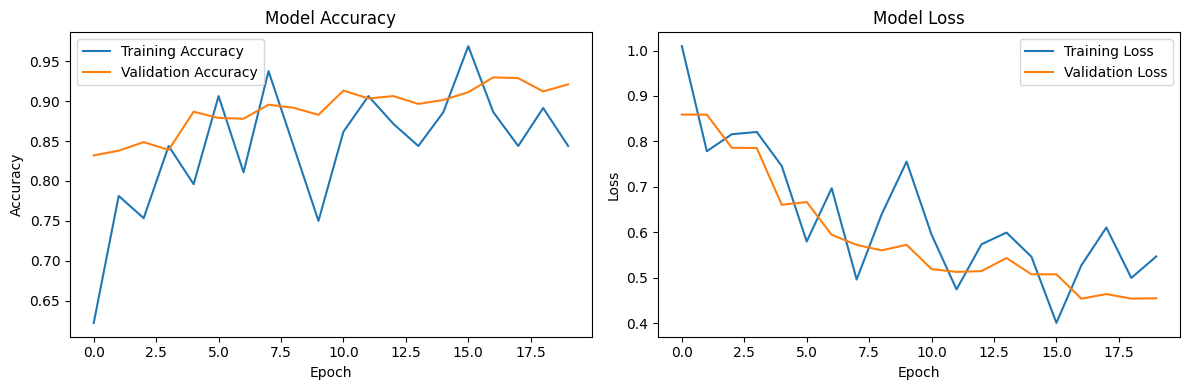

In [8]:
# 6. Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Model saving

In [9]:

# Save the model
model.save('pneumonia_cnn_model.h5')